['Inflacion', 'DeudaTotal', 'CostoDeEmpleo', 'TasaDesempleo']
Variable seleccionada: Inflacion
Variable seleccionada: DeudaTotal
Variable seleccionada: CostoDeEmpleo
Variable seleccionada: TasaDesempleo
{'variables': ['Inflacion', 'DeudaTotal', 'CostoDeEmpleo', 'TasaDesempleo'], 'r2': 0.4963557859228239}
0.4963557859228239


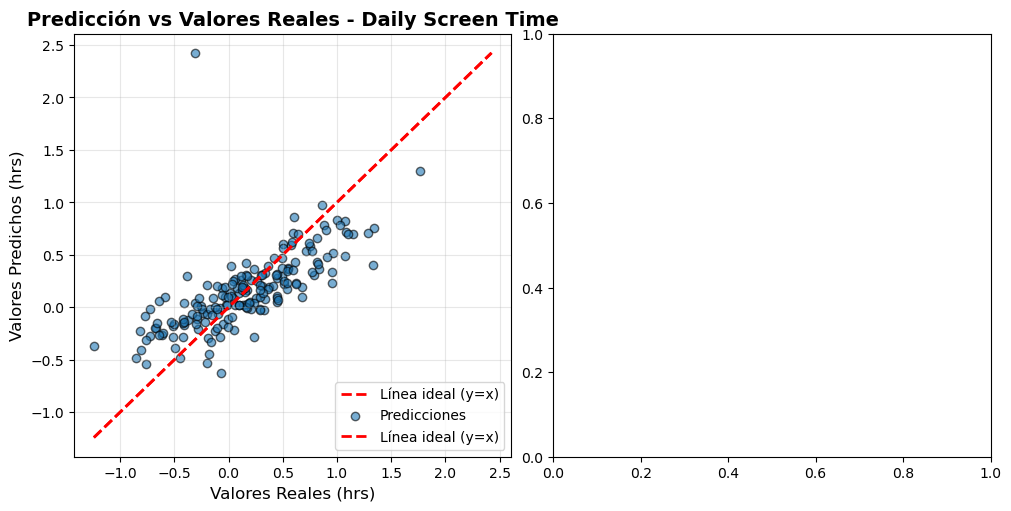

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime

def SFFS(possibleVar, y, data):
    selected_vars = {'variables': [], 'r2': None} # Diccionario para almacenar las variables seleccionadas y su MAE (usar None cuando no existe)
    maeg = [] # Lista para almacenar el MAE en cada iteración
    n = len(possibleVar)
    
    while n > 0:# while para recorrer todas las variables posibles
        lr = LinearRegression() 
        largo = len(selected_vars['variables'])
        for i in possibleVar:
            test = selected_vars['variables'] + [i]
            lr.fit(data[test], y)
            y_hat = lr.predict(data[test])
            r2 = r2_score(y, y_hat)
            
            # Comprobar de forma explícita si aún no hay MAE almacenado o si el nuevo MAE es menor
            if (selected_vars['r2'] is None) or (r2 > selected_vars['r2']):
                selected_vars['variables'] = test
                variableSelected = i
                selected_vars['r2'] = r2  
                maeg.append(selected_vars['r2'])
                print(f"Variable seleccionada: {i}")
        n -= 1 # Decrementar la iteracion
        if largo < len(selected_vars['variables']):
            possibleVar.remove(variableSelected) # Remover la variable ya seleccionada
    
    return selected_vars, maeg 

df1 = pd.read_excel('Datos_Tarea7.xlsx').set_index('Descripción series').T


y = df1['CambioDeSueldo']
posibleVar = df1.columns.tolist()
posibleVar.remove('CambioDeSueldo')
print(posibleVar)# lista con nuevos valores para el índice
selected_vars, maeg = SFFS( posibleVar, y, df1)
valores = df1[selected_vars['variables']]
lr = LinearRegression()
lr.fit(valores, y)
y_hat = lr.predict(valores)
print(selected_vars)
r2 = r2_score(y, y_hat)
mae = mean_absolute_error(y, y_hat)
rmse = np.sqrt(mean_squared_error(y, y_hat))
print(r2)

# Crear gráfica 
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Añadir recta de regresión lineal (y = x, línea ideal)
min_val = min(y.min(), y_hat.min())
max_val = max(y.max(), y_hat.max())
axs[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Línea ideal (y=x)')

# Gráfica de dispersión
axs[0].scatter(y, y_hat, alpha=0.6, edgecolors='k', label='Predicciones')
axs[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Línea ideal (y=x)')
axs[0].set_xlabel('Valores Reales (hrs)', fontsize=12)
axs[0].set_ylabel('Valores Predichos (hrs)', fontsize=12)
axs[0].set_title('Predicción vs Valores Reales - Daily Screen Time', fontsize=14, fontweight='bold')
axs[0].legend()
axs[0].grid(True, alpha=0.3)

,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,...,2024-11-01,2024-12-01,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01,2025-08-01
Descripción series,,,,,,,,,,,,,,,,,,,,,
TasaDesempleo,9.145218e+00,8.870242e+00,8.809634e+00,8.578594e+00,8.337966e+00,8.324486e+00,7.925659e+00,7.707087e+00,7.415707e+00,7.542063e+00,...,8.372000e+00,8.478207e+00,8.374969e+00,8.507400e+00,8.498176e+00,8.704792e+00,8.863903e+00,8.860306e+00,8.521537e+00,8.361310e+00
DeudasTotal,5.070745e+07,5.101203e+07,5.135513e+07,5.193194e+07,5.203639e+07,5.277959e+07,5.299234e+07,5.361911e+07,5.409936e+07,5.464333e+07,...,1.859692e+08,1.863861e+08,1.883546e+08,1.887410e+08,1.896389e+08,1.904465e+08,1.905978e+08,1.914663e+08,1.918370e+08,1.928298e+08
VariacionDeSueldo,-2.017646e-01,4.424914e-01,1.363535e-01,1.708407e-01,4.803761e-02,3.362212e-01,3.358640e-01,1.957789e-01,1.374782e-01,8.765119e-01,...,-4.182095e-03,8.977862e-01,5.428356e-01,-2.966356e-01,-1.113234e-03,1.365125e-01,1.243340e-01,1.100880e+00,-3.799695e-01,1.582828e-01
GastoDeEmpleo,-1.516046e-02,1.168260e+00,4.476767e-01,2.751918e-01,4.890886e-01,4.720610e-01,1.046885e+00,1.535023e-01,3.483085e-01,1.509713e+00,...,2.898402e-01,1.143504e+00,9.080029e-01,-3.199417e-02,7.195089e-01,5.842287e-01,3.516739e-01,6.789600e-01,5.720512e-01,6.541184e-01
Inflacion,7.250000e-01,7.000000e-01,3.500000e-01,2.500000e-01,6.500000e-01,3.000000e-01,3.250000e-01,1.650000e-01,1.250000e-01,5.000000e-02,...,6.000000e-01,0.000000e+00,4.500000e-01,4.000000e-01,5.000000e-01,3.000000e-01,2.000000e-01,-2.000000e-01,2.000000e-01,1.000000e-01


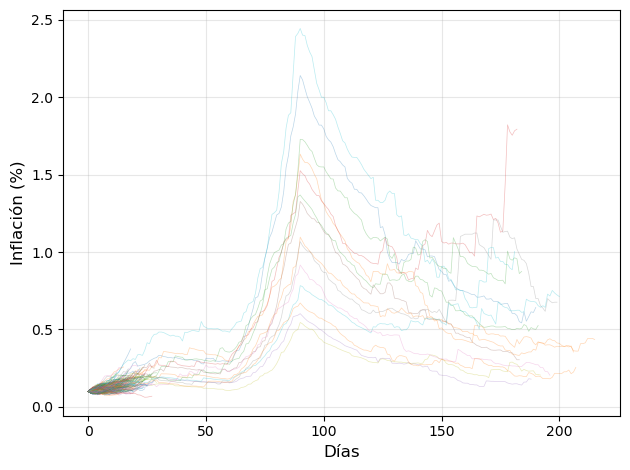

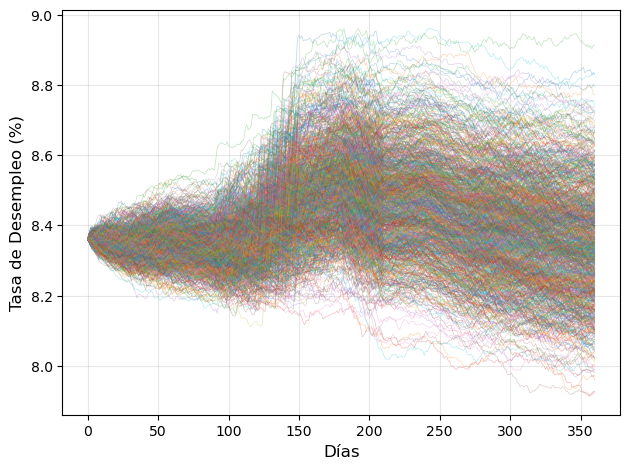

In [6]:
df1=pd.read_excel('ED_TASAJ.xlsx').set_index('Descripción series').drop('Reg',axis=1)
df2=pd.read_excel('EST_GEN_DEU_01.xlsx').set_index('Descripción series').drop('Reg',axis=1)
df3=pd.read_excel('ED_VAR_REM_M_2023_EMP.xlsx').set_index('Descripción series').drop('Reg',axis=1)
df4=pd.read_excel('EXE_EOF_1.xlsx').set_index('Descripción series').drop('Reg',axis=1)

df = pd.concat([df1,df2,df3,df4],join='inner').drop('\xa0\xa0\xa0Hombres',axis=0).drop('\xa0\xa0\xa0Mujeres',axis=0)
indices = df.index.tolist()
valores = ["TasaDesempleo", "DeudasTotal","VariacionDeSueldo","GastoDeEmpleo","Inflacion"]

df.columns = pd.to_datetime(df.columns)

columnasNuevas ={}
for i in range(len(indices)):
    columnasNuevas[indices[i]]=valores[i]
df = df.rename(index=columnasNuevas)
df.to_excel('Datos_Tarea7.xlsx')
df1 = df.T
display(df)




experimentos = 1000
años = 5
mes = 12
dias = 30

df2 = pd.DataFrame(df1["Inflacion"])
df2["mes"] = df1.index.month
df2["cambio_pct"] = df2["Inflacion"].pct_change() * 100  # Calcular cambio porcentual

# Agrupar los cambios porcentuales por mes
meses = df2.groupby("mes").agg({"cambio_pct": list})

inflacionInicial = df1['Inflacion'].values.tolist()[-1]

for i in range(experimentos):
    inflacion = [inflacionInicial]
    for k in range(1, mes+1):
        for l in range(dias):
            # Usar cambios porcentuales históricos
            cambio = np.random.choice([x for x in meses.loc[k, "cambio_pct"] if not np.isnan(x)])
            nuevoValor = inflacion[-1] * (1 + cambio/100/30)  # Aplicar cambio porcentual diario
            inflacion.append(nuevoValor)
    plt.plot(np.arange(0, dias*12 +1), inflacion, alpha=0.3, linewidth=0.5)

plt.xlabel('Días', fontsize=12)
plt.ylabel('Inflación (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

df3 = pd.DataFrame(df1["TasaDesempleo"])
df3["mes"] = df1.index.month
df3["cambio_pct"] = df3["TasaDesempleo"].pct_change() * 100  # Calcular cambio porcentual

# Agrupar los cambios porcentuales por mes
meses = df3.groupby("mes").agg({"cambio_pct": list})

desempleoInicial = df1['TasaDesempleo'].values.tolist()[-1]

for i in range(experimentos):
    desempleo = [desempleoInicial]
    for k in range(1, mes+1):
        for l in range(dias):
            # Usar cambios porcentuales históricos
            cambio = np.random.choice([x for x in meses.loc[k, "cambio_pct"] if not np.isnan(x)])
            nuevoValor = desempleo[-1] * (1 + cambio/100/30)  # Aplicar cambio porcentual diario
            desempleo.append(nuevoValor)
    plt.plot(np.arange(0, dias*12 +1), desempleo, alpha=0.3, linewidth=0.5)

plt.xlabel('Días', fontsize=12)
plt.ylabel('Tasa de Desempleo (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()